In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case4_rk4 import rk_defect_control_perfect_first_step,  rk_defect_control_static_alpha_beta, rk_defect_control_perfect_first_step_smooth

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999996, 1.0000000000000004, 1.0000000000000009, 0.49999999999999956, 0.9999999999999991, 0.5000000000000004]
beta values [0.9999999999999996, 1.0000000000000004, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.9999999999999991, 0.9999999999999991, 2.0000000000000018, 1.0000000000000009, 1.9999999999999982]
n_steps 35
n_successful_steps 28

integration complete


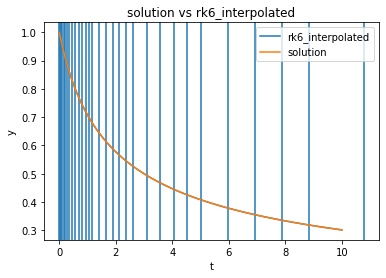

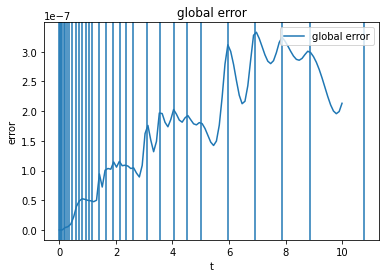

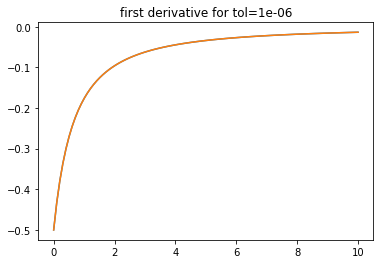

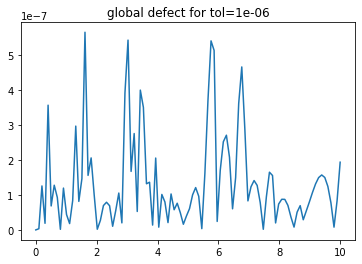

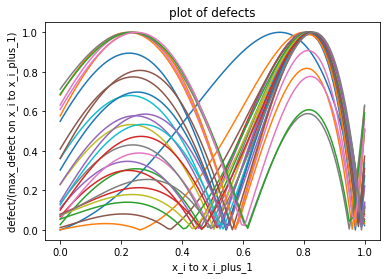

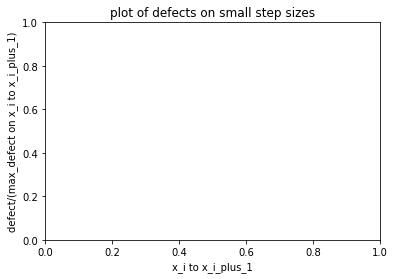

0.0
0.0
0.0
1.0644729542264031e-10
2.7703153104852163e-09
4.5759385169930056e-09
5.787516355049149e-09
6.5834915297102725e-09
3.12668781976555e-08
4.399073494365524e-08
5.009682391143855e-08
5.2468152267337587e-08
5.271479108781563e-08
5.1760484565122056e-08
5.0146113816929017e-08
9.450500837449027e-08
1.1203603333953538e-07
1.1675011613032638e-07
1.1527487808749015e-07
1.1088159157512933e-07
1.0523138893603345e-07
1.8080526509312023e-07
2.0260371669245103e-07
2.0241637305185023e-07
1.933448345869948e-07
1.8106537696960245e-07
3.113826566591982e-07
3.356510269725277e-07
3.238180731335305e-07
3.004924686855759e-07
5.443357088408263e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.9999999999999991, 1.0, 2.0, 0.5]
beta values [0.5, 1.0, 2.0, 1.0000000000000009]
n_steps 138
n_successful_steps 98

integration complete


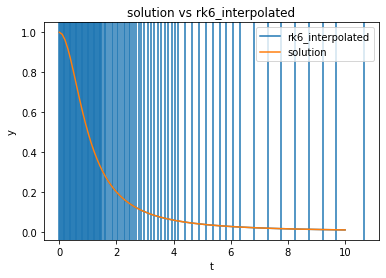

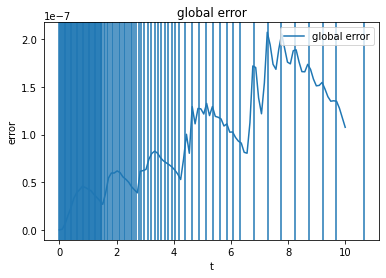

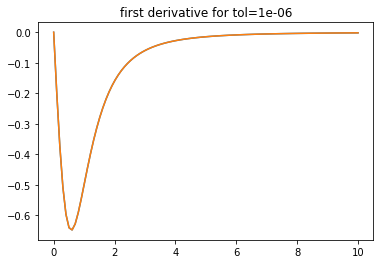

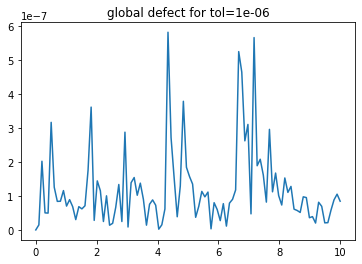

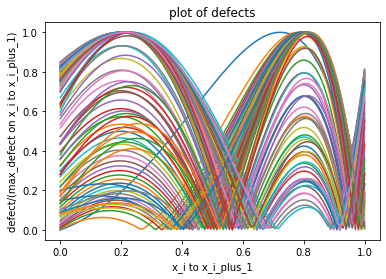

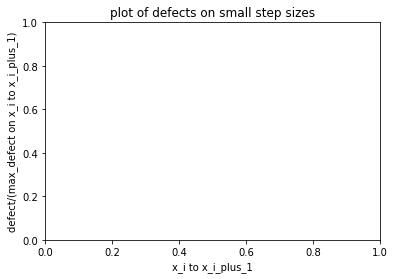

0.0
0.0
0.0
8.432557985216249e-10
2.0875674522358167e-09
3.69967556590467e-09
5.638068789615147e-09
7.854937034146303e-09
1.0298252695051247e-08
1.291382878410019e-08
1.564723639546628e-08
1.8445486138496392e-08
2.1258425353387622e-08
2.403982302112695e-08
2.674815180458978e-08
2.9347088092990248e-08
3.180576635397614e-08
3.4098826762196666e-08
3.620629829281796e-08
3.8113351474855506e-08
3.9809956664527135e-08
4.129047503909078e-08
4.255320429358278e-08
4.359990235514033e-08
4.443530143838359e-08
4.506662942826978e-08
4.550314613993578e-08
4.575570677900487e-08
4.583635515587048e-08
4.5757955868808153e-08
4.553386523387104e-08
4.517764262690349e-08
4.470280523527492e-08
4.412262144537493e-08
4.344994325444773e-08
4.269707387649646e-08
4.1875667933233274e-08
4.0996660510828065e-08
4.007022086360834e-08
3.9105728044663834e-08
3.811176457757526e-08
3.709612433899778e-08
3.60658334308539e-08
3.502717849102055e-08
3.398574360824469e-08
3.2946450068127575e-08
3.19136008175569e-08
3.08909255

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000009, 0.9999999999999981]
beta values [0.9999999999999991, 1.0, 2.0, 2.0000000000000004, 1.9999999999999991, 1.9999999999999996, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982]
n_steps 84
n_successful_steps 44

integration complete


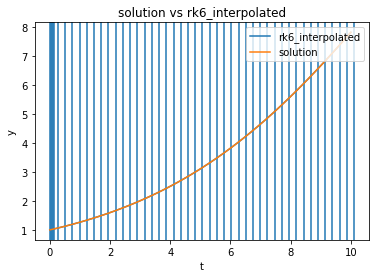

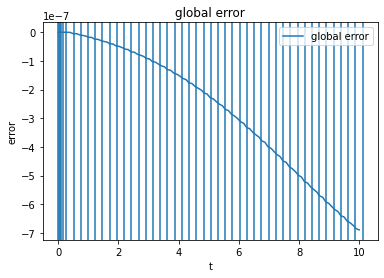

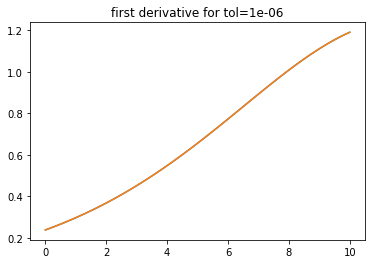

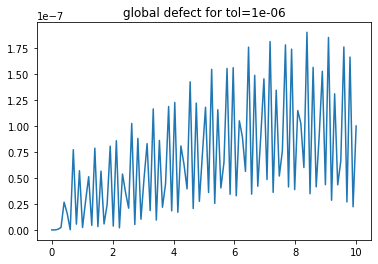

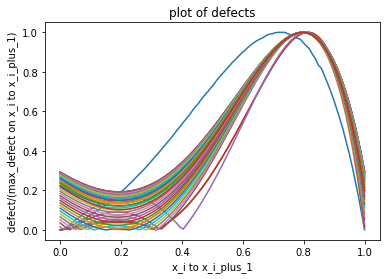

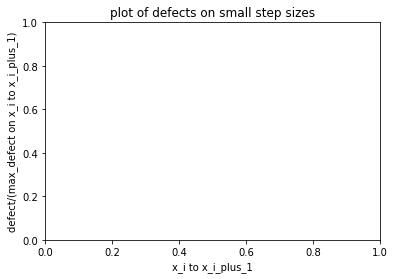

0.0
0.0
0.0
1.5654144647214707e-13
5.1874060602585814e-12
1.6789014622986542e-10
5.482796661127054e-09
1.1310261394115173e-08
1.767722879186806e-08
2.4610512516787253e-08
3.213658916756401e-08
4.028136912914704e-08
4.9069945440294305e-08
5.852632356528886e-08
6.867313007141718e-08
7.953130509719131e-08
9.111977528064585e-08
1.0345511558540466e-07
1.1655119980247264e-07
1.3041884239228807e-07
1.4506543788428417e-07
1.604946016087183e-07
1.76705813981215e-07
1.9369407855407417e-07
2.1144959516661288e-07
2.2995745574405646e-07
2.4919736452133634e-07
2.691433973467383e-07
2.8976379518041995e-07
3.1102079889322454e-07
3.328705426852707e-07
3.5526298436394654e-07
3.7814191067298e-07
4.0144499369176856e-07
4.2510390585448476e-07
4.490445135729715e-07
4.731871383611974e-07
4.974468854612724e-07
5.217340470764498e-07
5.459545944219713e-07
5.700107346129357e-07
5.938015528172969e-07
6.172237396739888e-07
6.401723897653255e-07
6.625418809136363e-07
6.842268227558179e-07
7.051230666021979e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 1.0000000000000073, 0.9999999999999852, 1.0000000000000295, 0.9999999999999408, 0.5000000000000592, 1.999999999999763, 0.5000000000000296, 1.9999999999998817, 0.5000000000002368, 2.0000000000009472, 0.4999999999995263, 2.000000000001895, 15.999999999999986, 1.000000000000237, 0.9999999999997632]
beta values [0.5, 1.0, 0.06250000000000006, 0.2500000000000002, 0.1250000000000001, 2.0, 1.9999999999999927, 0.9999999999999926, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 2.000000000001895, 0.9999999999999704, 0.9999999999998815, 0.5000000000000592, 0.4999999999995263, 1.0000000000000593, 1.9999999999998817, 1.000000000000237, 0.49999999999976313, 1.999999999999763, 1.0000000000001183, 1.9999999999990525, 0.5000000000000296, 0.9999999999997632, 1.0000000000004736]
n_steps 7138
n_successful_steps 5607

integration complete


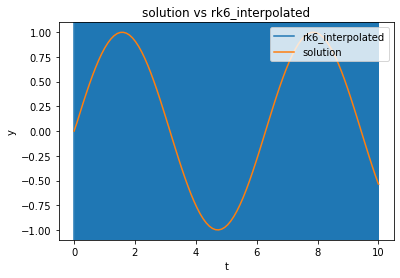

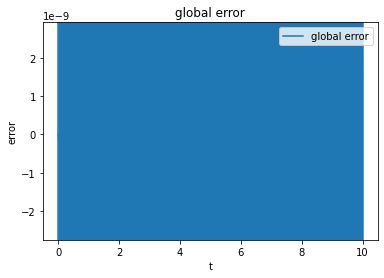

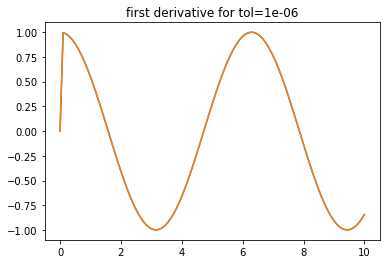

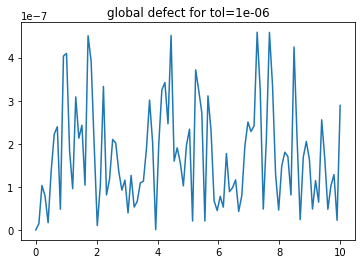

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0, 3.9999999999999964, 2.0000000000000147, 0.9999999999999852, 0.5000000000000074, 0.4999999999999963, 2.000000000000059, 0.4999999999999852, 1.9999999999999705, 0.9999999999997632, 1.0000000000000295, 1.9999999999998817, 0.9999999999999408, 0.5000000000000296, 1.000000000000237]
beta values [0.5, 1.0, 2.0, 1.9999999999999982, 0.2500000000000002, 0.4999999999999963, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 0.4999999999999852, 2.000000000000059, 0.9999999999999704, 0.5000000000000296, 0.9999999999997632, 1.9999999999998817, 1.0000000000000593, 1.000000000000237, 0.5000000000000074]
n_steps 1939
n_successful_steps 1649

integration complete


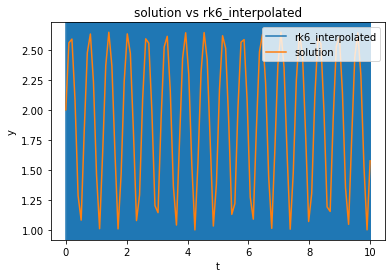

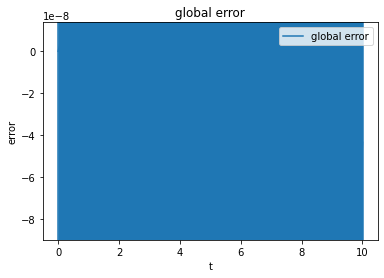

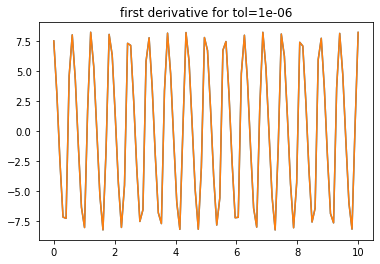

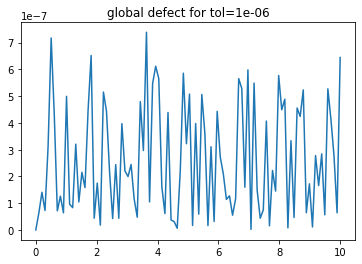

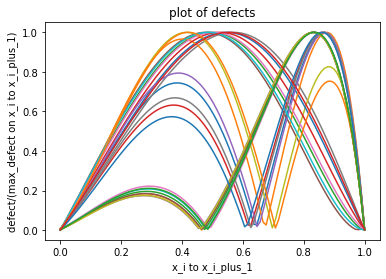

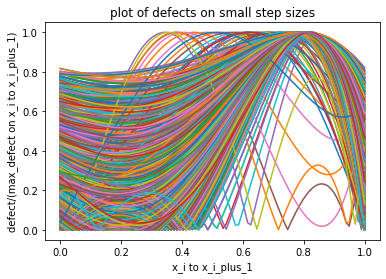

0.0
0.0
0.0
1.3712502244800362e-09
2.6524484830758865e-09
3.837671069817361e-09
4.921905549792882e-09
5.900933075508874e-09
6.771224914103868e-09
7.529856294041792e-09
8.174431354035505e-09
8.703023635092677e-09
9.114125454345867e-09
9.406610157469686e-09
9.579702808792945e-09
9.345004770011656e-09
9.158125813257811e-09
8.851724686564921e-09
8.426639830361182e-09
7.884059627372153e-09
7.225549936151765e-09
6.453091394575949e-09
5.569129157834141e-09
4.576633738651026e-09
3.4791729497385404e-09
2.2810020539054676e-09
9.871650163972845e-10
3.963833705711295e-10
1.862645149230957e-09
3.403428650017304e-09
5.00919572488101e-09
6.668914753760191e-09
8.369940296404366e-09
1.0097964242561375e-08
1.1837095748035154e-08
1.357017809233696e-08
1.5279507881160725e-08
1.694820839226452e-08
1.856265052779804e-08
2.011650734878856e-08
2.1617273970875317e-08
2.309643210018919e-08
2.4624738692580195e-08
2.633432227838739e-08
2.844892099673757e-08
3.132194170696323e-08
3.207329113408264e-08
3.2867252475

In [ ]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996, 0.5000000000000002]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004, 1.9999999999999991]
n_steps 26
n_successful_steps 21

integration complete


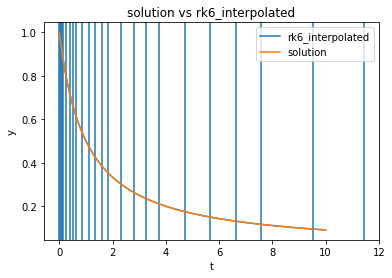

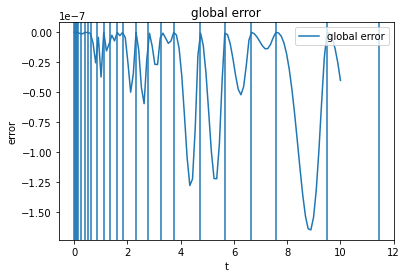

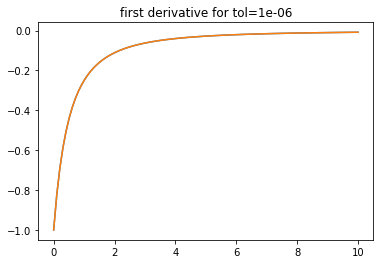

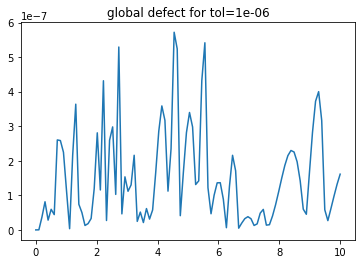

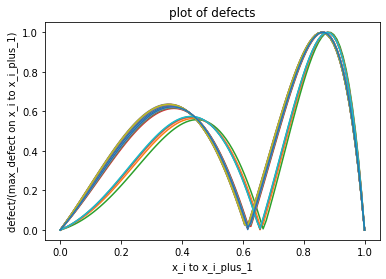

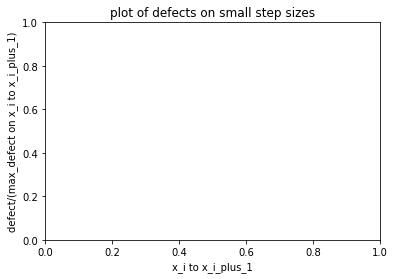

0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
5.551115123125783e-17
1.1102230246251565e-16
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
0.0
0.0
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
0.0
2.7755575615628914e-17
1.3877787807814457e-17


In [ ]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000009, 2.0, 1.0000000000000073, 0.4999999999999963]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.9999999999999991, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 1.9999999999999962, 0.5, 0.9999999999999926, 2.0000000000000147, 1.9999999999999927]
n_steps 130
n_successful_steps 72

integration complete


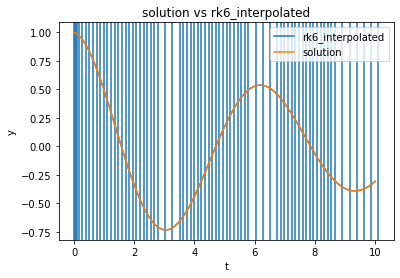

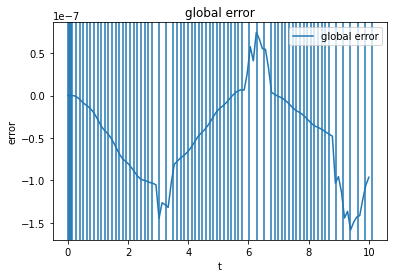

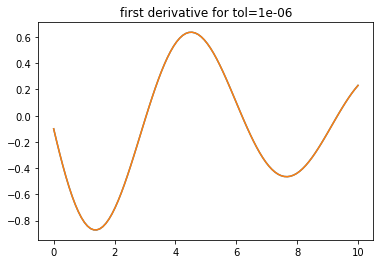

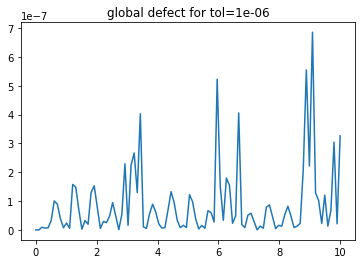

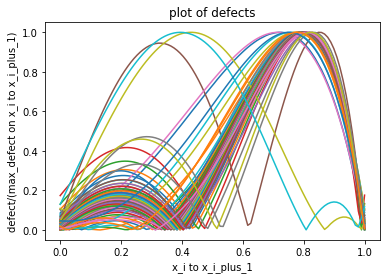

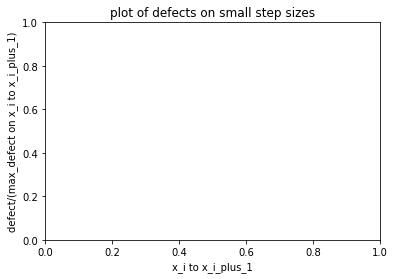

0.0
0.0
0.0
7.893685705084863e-13
3.7754244175403073e-11
1.948597949663622e-09
4.764993621897418e-09
8.413366336945671e-09
1.2810082661296462e-08
1.786288938987468e-08
2.3472439547589374e-08
2.9533885448351782e-08
3.593851216621147e-08
4.257538782637127e-08
4.933300787324235e-08
5.6100906725697897e-08
6.277121732123359e-08
6.924015640008552e-08
7.5409415684069e-08
8.118744193597038e-08
8.649058880205729e-08
9.124412903016577e-08
9.538311396273258e-08
9.885307272750055e-08
1.0161054342372466e-07
1.0362343549896735e-07
1.0487121870905725e-07
1.4500363854086373e-07
1.3582124602784518e-07
8.108477844714912e-08
7.752128761140398e-08
7.341168972718748e-08
6.882217185033568e-08
6.382430844942277e-08
5.8493905774614774e-08
5.2909812142676316e-08
4.7152713872344876e-08
4.130393219115014e-08
3.544424055645923e-08
2.9652717335824225e-08
2.400565027316226e-08
1.8575506799400898e-08
1.3429983791723998e-08
8.631148407101108e-09
4.234679773507111e-09
2.8922064743142073e-10
3.1641544384619635e-09
6.09

In [ ]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.9999999999999991, 1.0, 2.0, 0.5, 1.0000000000000038, 0.9999999999999963, 0.5000000000000009, 0.9999999999999981]
beta values [0.5, 1.0, 2.0, 0.9999999999999963, 1.0000000000000009, 1.0000000000000038, 1.9999999999999962, 1.0000000000000018]
n_steps 129
n_successful_steps 93

integration complete


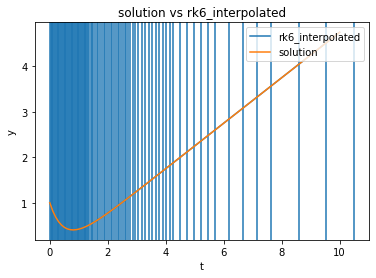

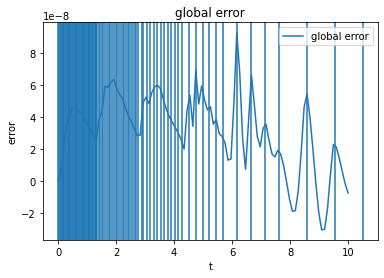

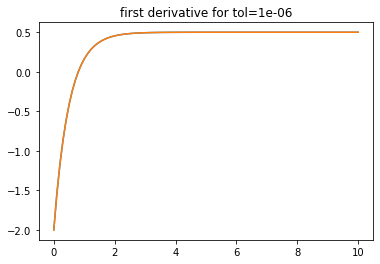

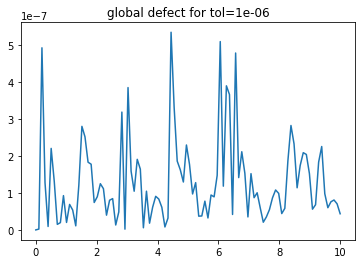

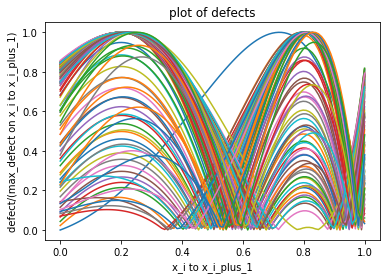

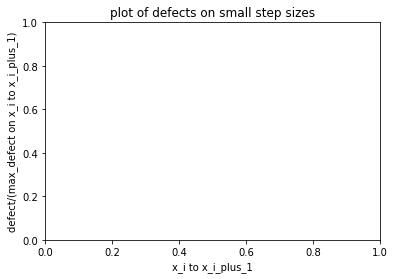

0.0
0.0
0.0
7.112826105881709e-09
1.3397214893018372e-08
1.8925532918601107e-08
2.3764527679048797e-08
2.7975736616170366e-08
3.161586792366222e-08
3.473715370905239e-08
3.738767939687193e-08
3.9611689484075896e-08
4.144987153509305e-08
4.293962108103955e-08
4.4115286257362385e-08
4.500839645427135e-08
4.56478740362698e-08
4.606023101816348e-08
4.626975158572577e-08
4.629866184879816e-08
4.616728710438167e-08
4.589419788647575e-08
4.549634524675383e-08
4.498918676487662e-08
4.4386802511287016e-08
4.3702003627021924e-08
4.294643185520641e-08
4.213065263325433e-08
4.126424069106349e-08
4.035585998707347e-08
3.941333692747406e-08
3.844372881145475e-08
3.745338666982789e-08
3.6448013718271e-08
3.5432719258654544e-08
3.441206836152233e-08
3.339012821790277e-08
3.237051038329497e-08
3.13564100795638e-08
3.035064266576626e-08
2.9355676722797597e-08
2.837366519514717e-08
2.740647347954095e-08
2.6455705903760673e-08
2.5522729651950016e-08
2.4608696969075083e-08
3.8903120946898184e-08
3.71156009

In [ ]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)